In [24]:
import pandas as pd
import glob
import os
from sklearn.linear_model import LinearRegression
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
dfs = pd.read_csv(r'C:\Users\Brian\Main Folder\EV Bets\data\linear regression predictions\jupyter_test.csv')

In [26]:
df = dfs[dfs['Value'] != 0]
df = df[df['First Last Name'] == 'Jalen Brunson']
df = df[df['Statistic'] == 'points']
df.head(5)

,Unnamed: 0,First Last Name,team,Opposing Team,Statistic,Value,Defensive Rating,Today Opposing Team,team name,Today Defensive Rating
167,167,Jalen Brunson,New York Knicks,Golden State Warriors,points,27,0.968512,Philadelphia 76ers,Philadelphia 76ers,1.031401
253,253,Jalen Brunson,New York Knicks,Detroit Pistons,points,35,1.011167,Philadelphia 76ers,Philadelphia 76ers,1.031401
302,302,Jalen Brunson,New York Knicks,Boston Celtics,points,34,0.947771,Philadelphia 76ers,Philadelphia 76ers,1.031401
386,386,Jalen Brunson,New York Knicks,Philadelphia 76ers,points,21,1.031401,Philadelphia 76ers,Philadelphia 76ers,1.031401
446,446,Jalen Brunson,New York Knicks,Orlando Magic,points,33,0.950111,Philadelphia 76ers,Philadelphia 76ers,1.031401


In [27]:
x = df[['Defensive Rating']]
y = df['Value']
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

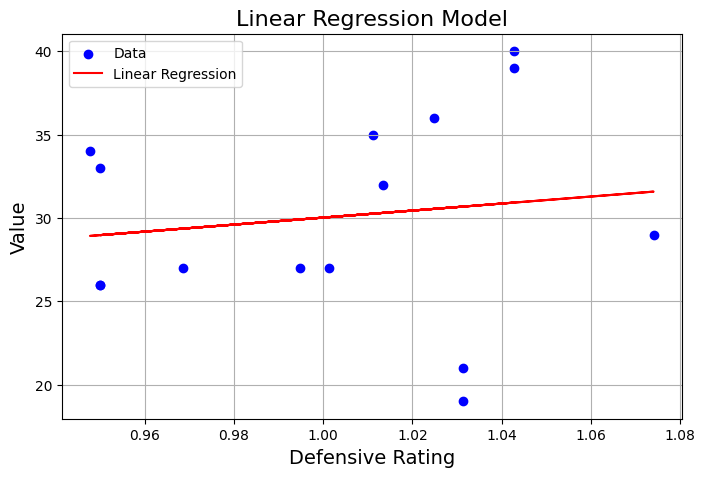

In [28]:
# Set the size of the plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Data')

# Create a line plot of the linear regression model
predictions = reg.predict(x)
plt.plot(x, predictions, color='red', label='Linear Regression')

# Add labels to the axes and a title
plt.xlabel('Defensive Rating', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Linear Regression Model', fontsize=16)

# Add a legend
plt.legend()

# Add a grid
plt.grid(True)

# Display the plot
plt.show()

In [29]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the testing set
predictions = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.0


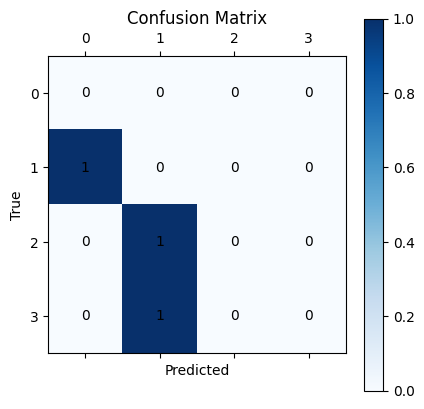

: 

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))

# Plot the confusion matrix
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Add text annotations to the plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.show()